<a href="https://colab.research.google.com/github/Tanushree-233/PRODIGY_ML_02/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [13]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [14]:
# Encode Gender (Male=1, Female=0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Select features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

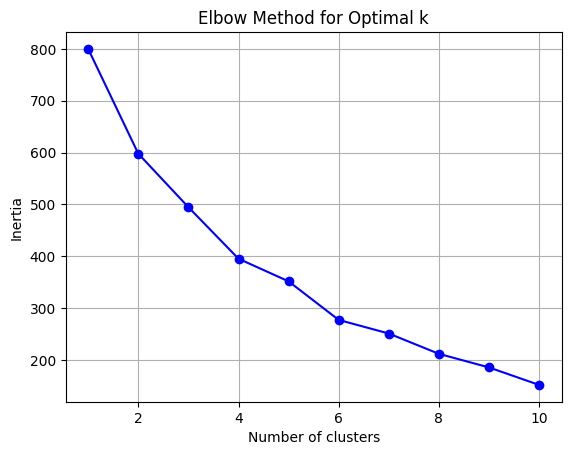

In [5]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

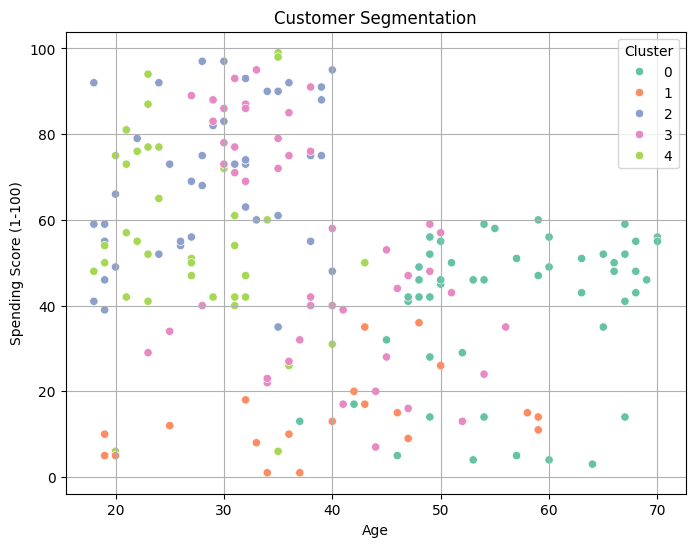

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title('Customer Segmentation')
plt.grid(True)
plt.show()

In [8]:
df.to_csv('Segmented_Customers.csv', index=False)

In [18]:
# View basic stats of each cluster
df.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,65.333333,0.509804,56.470588,46.098039,39.313725
1,159.500000,1.000000,39.500000,85.150000,14.050000
2,100.809524,1.000000,28.690476,60.904762,70.238095
3,151.510204,0.000000,37.897959,82.122449,54.448980
4,50.526316,0.000000,27.315789,38.842105,56.210526


In [20]:
# How many customers in each cluster
df['Cluster'].value_counts()

,count
Cluster,
0,51
3,49
2,42
4,38
1,20


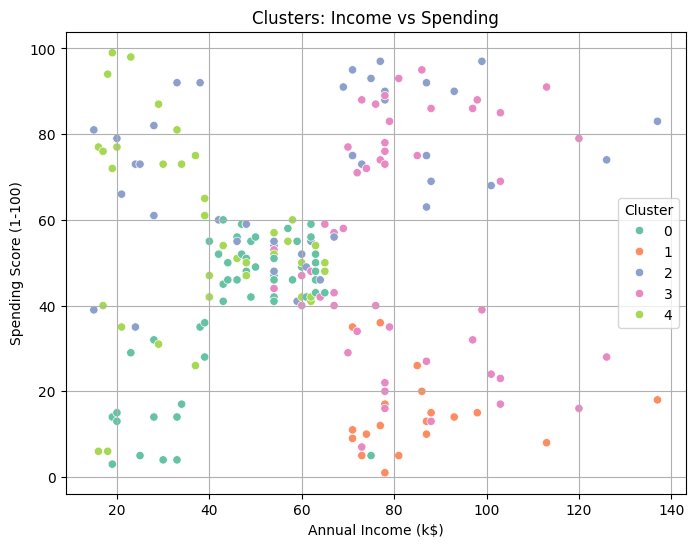

In [22]:
# Cluster vs Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df, # Changed 'data' to 'df'
    palette='Set2'
)
plt.title('Clusters: Income vs Spending')
plt.grid(True)
plt.show()

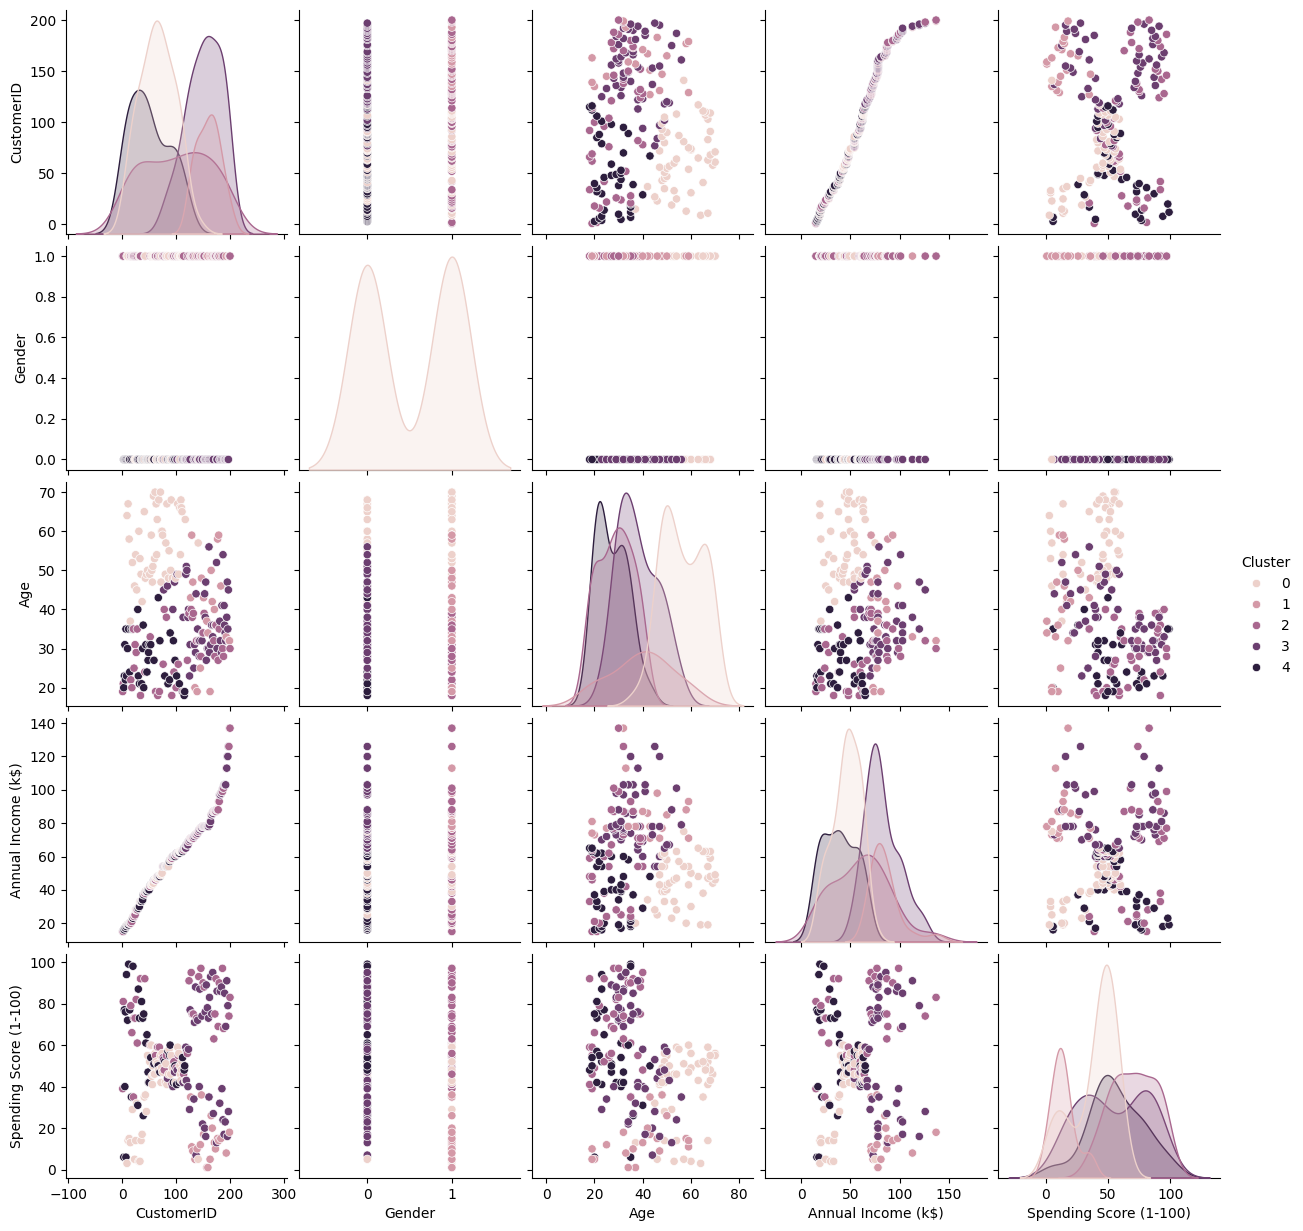

In [24]:
sns.pairplot(df, hue='Cluster', diag_kind='kde')

In [25]:
# Example: Predict cluster for new customer
new_customer = [[1, 25, 60, 75]]  # [Gender (1=Male), Age, Income, Spending]
new_customer_scaled = scaler.transform(new_customer)
predicted_cluster = kmeans.predict(new_customer_scaled)
print("Predicted cluster:", predicted_cluster[0])

Predicted cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
from google.colab import files
files.download('Segmented_Customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>